In [1]:
from PIL import Image
import os

import sys

sys.path.append('../')
from gpibc.classifier import BinaryClassifier
import numpy as np

Load dataset and label set from file.

In [2]:
IH = 128
IW = 128

data = np.array([])
label = np.array([])

# load 'cork' as label '1'
for root, ds, fs in os.walk('../datasets/kth/cork_all/'):
    for f in fs:
        # read image and convert it to ndarray type
        image = Image.open('../datasets/kth/cork_all/' + f).convert('L')
        image = image.resize((IH, IW))
        image_arr = np.array(image).astype(float)
        # add to data and label
        data = np.append(data, image_arr)
        label = np.append(label, [1])

# load 'brown bread' as label '0'
for root, ds, fs in os.walk('../datasets/kth/brown_bread_all/'):
    for f in fs:
        # read image and convert it to ndarray type
        image = Image.open('../datasets/kth/brown_bread_all/' + f).convert('L')
        image = image.resize((IH, IW))
        image_arr = np.array(image).astype(float)
        # add to data and label
        data = np.append(data, image_arr)
        label = np.append(label, [0])

data = data.reshape(-1, IH, IW)
print(f'data shape: {data.shape}; label shape: {label.shape}')

data shape: (864, 128, 128); label shape: (864,)


Shuffle dataset and label.

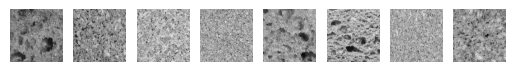

[0. 0. 1. 1. 0. 0. 1. 0.]


In [3]:
# shuffle
data_label = list(zip(data, label))
np.random.shuffle(data_label)
data, label = zip(*data_label)
data, label = np.array(data), np.array(label)

# show 8 figures
from matplotlib import pyplot as plt

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.axis('off')
plt.show()

# their correspond labels
print(label[:8])

Split train set and test set.

In [4]:
size = len(data)
train_size = size // 4 * 3
train_data, train_label, test_data, test_label = data[:train_size], label[:train_size], \
                                                 data[train_size:], label[train_size:]
print(f'train data shape: {train_data.shape}; test data shape: {test_data.shape}')

train data shape: (648, 128, 128); test data shape: (216, 128, 128)


Create a binary classifier and send train_data, train_label, test_data, test_label to it.
This cell uses 'py_cuda' as cuda backend.
The arg 'eval_batch' is set to 10 to avoid memory allocate failed on the GPU.

In [5]:
import time

device = 'py_cuda'
eval_batch = 10

# if the two following args are set to None, the nvcc will automatically select one for compiling
# this might have mistakes, so you can specify these two args
# such as: cuda_arch = 'compute_75'; cuda_code = 'sm_75'
cuda_arch = None
cuda_code = None

fit_criterion = 'accuracy'

classifier = BinaryClassifier(train_data, train_label, test_data, test_label,
                              eval_batch=eval_batch, device=device, fit_criterion=fit_criterion)

# train
classifier.train()

# test
classifier.run_test()

# remove the reference, to make sure the device side memory space is cleared
del classifier

[ Generation   ]  0
[ Best Fitness ]  0.8657407407407407
[ Best Program ]  [ Sub G_Std Hist_Eq Lap Region_R(47, 95, 54, 26) G_Std Hist_Eq Sobel_X Region_S(19, 61, 54, 54) ]

[ Generation   ]  1
[ Best Fitness ]  0.8657407407407407
[ Best Program ]  [ Sub G_Std Hist_Eq Lap Region_R(47, 95, 54, 26) G_Std Hist_Eq Sobel_X Region_S(19, 61, 54, 54) ]

[ Generation   ]  2
[ Best Fitness ]  0.8796296296296297
[ Best Program ]  [ Sub G_Std Gau11 LoG2 Region_S(10, 27, 82, 82) G_Std GauXY LBP Region_R(77, 101, 20, 23) ]

[ Generation   ]  3
[ Best Fitness ]  0.8827160493827161
[ Best Program ]  [ Sub G_Std Region_S(14, 0, 50, 50) Sub Sub G_Std Sobel_Y Region_S(27, 0, 77, 77) G_Std LoG2 Region_R(28, 15, 64, 26) Sub Sub G_Std Region_S(74, 93, 23, 23) G_Std Region_S(81, 13, 29, 29) Sub G_Std Region_S(100, 99, 22, 22) G_Std Region_S(97, 26, 28, 28) ]

[ Generation   ]  4
[ Best Fitness ]  0.9120370370370371
[ Best Program ]  [ Sub G_Std Region_S(97, 26, 28, 28) Sub Sub G_Std Sobel_Y Region_S(27, 0, 7